# 자동 미분과 선형 회귀 실습

In [1]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [6]:
w = tf.Variable(2.)

def f(w):
    return 2*(w**2)+5

with tf.GradientTape() as tape: #자동 미분 기능 수행 > 4w
    z = f(w)

gradients = tape.gradient(z, [w]) # 미분한 함수에 [w] 대입
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]

## 자동 미분을 이용한 선형 회귀 구현

In [10]:
W = tf.Variable(4.)
b = tf.Variable(1.)

In [11]:
@tf.function
def hypothesis(x):
    return W*x + b

x_test = [3.5, 5, 5.5, 6]
hypothesis(x_test).numpy()

array([15., 21., 23., 25.], dtype=float32)

In [13]:
# 손실 함수 정의: 평균 제곱 오차
@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred-y))

In [14]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [17]:
optimizer = tf.optimizers.SGD(0.01)

for i in range(301):
    with tf.GradientTape() as tape:
        y_pred = hypothesis(X)
        cost = mse_loss(y_pred, y)
    gradients = tape.gradient(cost, [W, b]) # 손실 함수에 대한 파라미터의 미분값 계산
    optimizer.apply_gradients(zip(gradients, [W, b])) # 파라미터 업데이트
    
    if i % 10 == 0:
        print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [18]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


## Keras 이용

In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [20]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear')) # 입력-출력 1-1 선형회귀 'linear'

model.compile(optimizer=optimizers.SGD(lr=0.01) ,loss='mse',metrics=['mse'])
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 574us/step - loss: 345.2880 - mse: 345.2880
Epoch 2/300
9/9 [==============================] - 0s 534us/step - loss: 1.6809 - mse: 1.6809
Epoch 3/300
9/9 [==============================] - 0s 509us/step - loss: 1.6815 - mse: 1.6815
Epoch 4/300
9/9 [==============================] - 0s 519us/step - loss: 1.6820 - mse: 1.6820
Epoch 5/300
9/9 [==============================] - 0s 499us/step - loss: 1.6826 - mse: 1.6826
Epoch 6/300
9/9 [==============================] - 0s 524us/step - loss: 1.6831 - mse: 1.6831
Epoch 7/300
9/9 [==============================] - 0s 496us/step - loss: 1.6836 - mse: 1.6836
Epoch 8/300
9/9 [==============================] - 0s 499us/step - loss: 1.6841 - mse: 1.6841
Epoch 9/300
9/9 [==============================] - 0s 466us/step - loss: 1.6846 - mse: 1.6846
Epoch 10/300
9/9 [==============================] - 0s 509us/step - loss: 1.6851 - mse: 1.6851
Epoch 11/300
9/9 [==============================] - 0s 

9/9 [==============================] - 0s 475us/step - loss: 1.6977 - mse: 1.6977
Epoch 88/300
9/9 [==============================] - 0s 492us/step - loss: 1.6977 - mse: 1.6977
Epoch 89/300
9/9 [==============================] - 0s 467us/step - loss: 1.6978 - mse: 1.6978
Epoch 90/300
9/9 [==============================] - 0s 477us/step - loss: 1.6978 - mse: 1.6978
Epoch 91/300
9/9 [==============================] - 0s 586us/step - loss: 1.6978 - mse: 1.6978
Epoch 92/300
9/9 [==============================] - 0s 530us/step - loss: 1.6979 - mse: 1.6979
Epoch 93/300
9/9 [==============================] - 0s 452us/step - loss: 1.6979 - mse: 1.6979
Epoch 94/300
9/9 [==============================] - 0s 853us/step - loss: 1.6979 - mse: 1.6979
Epoch 95/300
9/9 [==============================] - 0s 515us/step - loss: 1.6979 - mse: 1.6979
Epoch 96/300
9/9 [==============================] - 0s 504us/step - loss: 1.6980 - mse: 1.6980
Epoch 97/300
9/9 [==============================] - 0s 465us/st

9/9 [==============================] - 0s 574us/step - loss: 1.6987 - mse: 1.6987
Epoch 173/300
9/9 [==============================] - 0s 510us/step - loss: 1.6987 - mse: 1.6987
Epoch 174/300
9/9 [==============================] - 0s 491us/step - loss: 1.6987 - mse: 1.6987
Epoch 175/300
9/9 [==============================] - 0s 486us/step - loss: 1.6987 - mse: 1.6987
Epoch 176/300
9/9 [==============================] - 0s 662us/step - loss: 1.6987 - mse: 1.6987
Epoch 177/300
9/9 [==============================] - 0s 510us/step - loss: 1.6987 - mse: 1.6987
Epoch 178/300
9/9 [==============================] - 0s 456us/step - loss: 1.6987 - mse: 1.6987
Epoch 179/300
9/9 [==============================] - 0s 673us/step - loss: 1.6987 - mse: 1.6987
Epoch 180/300
9/9 [==============================] - 0s 489us/step - loss: 1.6987 - mse: 1.6987
Epoch 181/300
9/9 [==============================] - 0s 500us/step - loss: 1.6987 - mse: 1.6987
Epoch 182/300
9/9 [==============================] - 0

9/9 [==============================] - 0s 502us/step - loss: 1.6987 - mse: 1.6987
Epoch 258/300
9/9 [==============================] - 0s 504us/step - loss: 1.6987 - mse: 1.6987
Epoch 259/300
9/9 [==============================] - 0s 489us/step - loss: 1.6987 - mse: 1.6987
Epoch 260/300
9/9 [==============================] - 0s 769us/step - loss: 1.6987 - mse: 1.6987
Epoch 261/300
9/9 [==============================] - 0s 558us/step - loss: 1.6987 - mse: 1.6987
Epoch 262/300
9/9 [==============================] - 0s 485us/step - loss: 1.6987 - mse: 1.6987
Epoch 263/300
9/9 [==============================] - 0s 499us/step - loss: 1.6987 - mse: 1.6987
Epoch 264/300
9/9 [==============================] - 0s 513us/step - loss: 1.6987 - mse: 1.6987
Epoch 265/300
9/9 [==============================] - 0s 491us/step - loss: 1.6987 - mse: 1.6987
Epoch 266/300
9/9 [==============================] - 0s 484us/step - loss: 1.6987 - mse: 1.6987
Epoch 267/300
9/9 [==============================] - 0

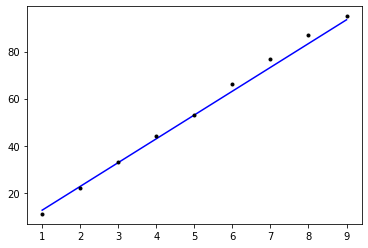

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [22]:
model.predict([9.5])

array([[98.556465]], dtype=float32)